<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Recoomend%20system(Book).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"/content/book.csv"

In [3]:
data = pd.read_csv(path, encoding='latin1')


In [4]:
print(data.head())
print(data.describe())

num_users = data['User.ID'].nunique()
num_books = data['Book.Title'].nunique()
print("Number of unique users:", num_users)
print("Number of unique books:", num_books)


   Unnamed: 0  User.ID                                         Book.Title  \
0           1   276726                                Classical Mythology   
1           2   276729                                       Clara Callan   
2           3   276729                               Decision in Normandy   
3           4   276736  Flu: The Story of the Great Influenza Pandemic...   
4           5   276737                             The Mummies of Urumchi   

   Book.Rating  
0            5  
1            3  
2            6  
3            8  
4            6  
        Unnamed: 0        User.ID  Book.Rating
count  10000.00000   10000.000000  10000.00000
mean    5000.50000   95321.249800      7.56630
std     2886.89568  117645.703609      1.82152
min        1.00000       8.000000      1.00000
25%     2500.75000    2103.000000      7.00000
50%     5000.50000    3757.000000      8.00000
75%     7500.25000  162052.000000      9.00000
max    10000.00000  278854.000000     10.00000
Number of un

In [5]:
data.columns

Index(['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [6]:
data.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


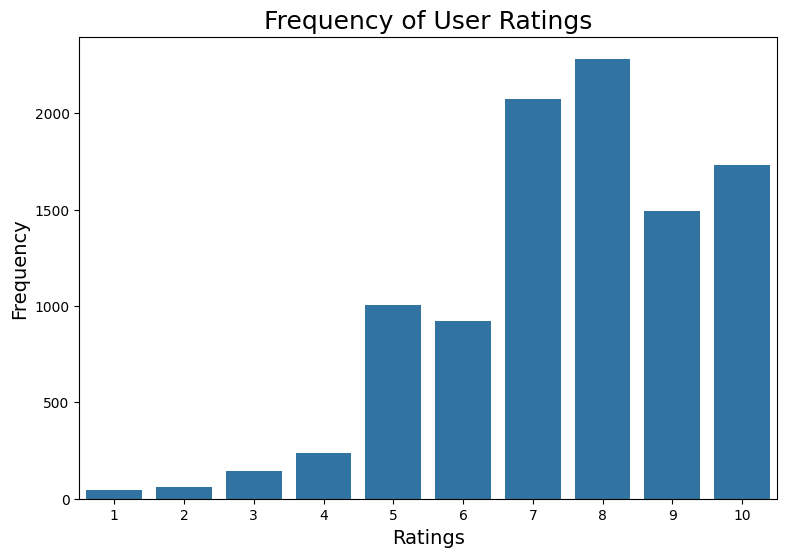

In [8]:
plt.figure(figsize=(9,6))
sns.countplot(x=data['Book.Rating'])
plt.title("Frequency of User Ratings", fontsize= 18)
plt.xlabel("Ratings", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14)
plt.show()

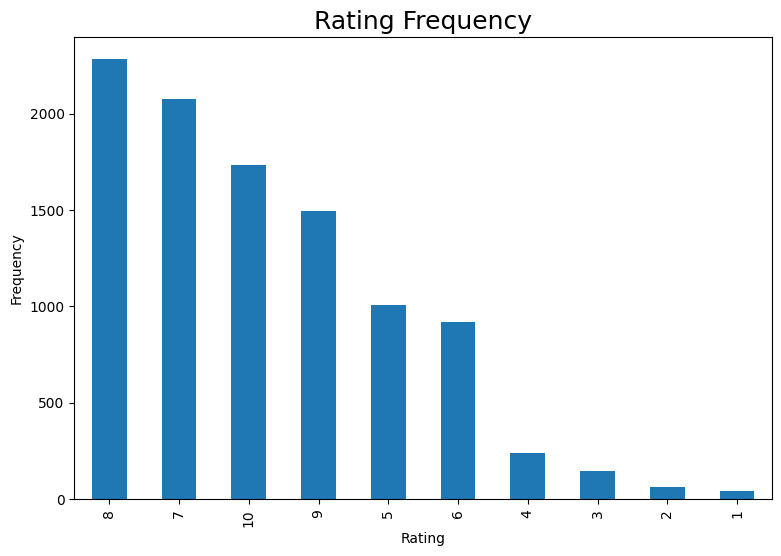

In [9]:
plt.figure(figsize=(9,6))
data['Book.Rating'].value_counts().plot(kind='bar')
plt.title('Rating Frequency', fontsize=18)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [10]:

top_books=data['Book.Title'].value_counts().head(10)
top_books.index

Index(['Fahrenheit 451', 'Charlie and the Chocolate Factory',
       'The Subtle Knife (His Dark Materials, Book 2)', 'Vanished',
       'Ender's Game (Ender Wiggins Saga (Paperback))', 'Stardust',
       'The Amber Spyglass (His Dark Materials, Book 3)', 'Life Is Elsewhere',
       'The Golden Compass (His Dark Materials, Book 1)',
       'The Hitchhiker's Guide to the Galaxy'],
      dtype='object', name='Book.Title')

Text(0.5, 1.0, 'Top 10 Most frequent books bought')

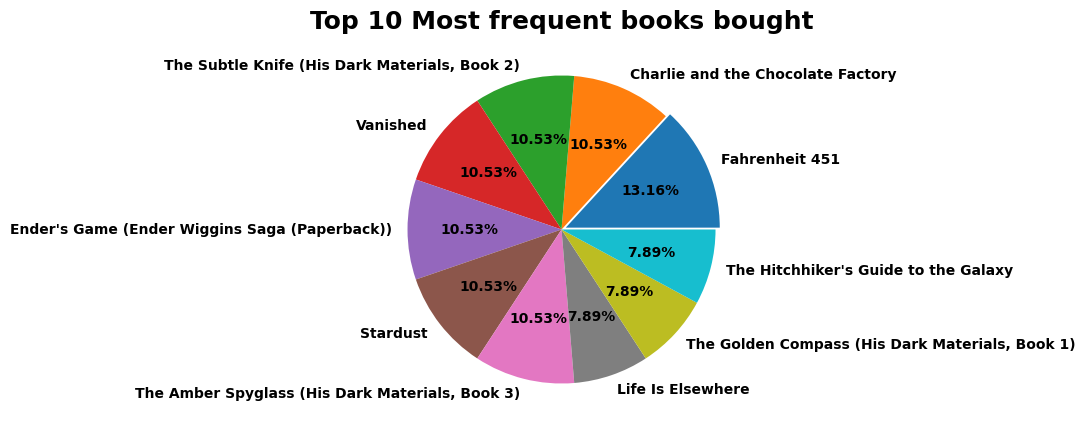

In [11]:

plt.figure(figsize=(6,5))
plt.pie(top_books,labels=top_books.index,
        explode=[0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%', textprops = {'size' : 10, 'fontweight': 'bold'})
plt.title("Top 10 Most frequent books bought",fontsize=18,fontweight='bold')

In [12]:
data = data.drop(['User.ID'], axis=1)


data['Book.Title'] = data['Book.Title'].str.lower()


In [13]:
vectorizer = CountVectorizer()

book_matrix = vectorizer.fit_transform(data['Book.Title'])


In [14]:
cosine_sim = cosine_similarity(book_matrix, book_matrix)


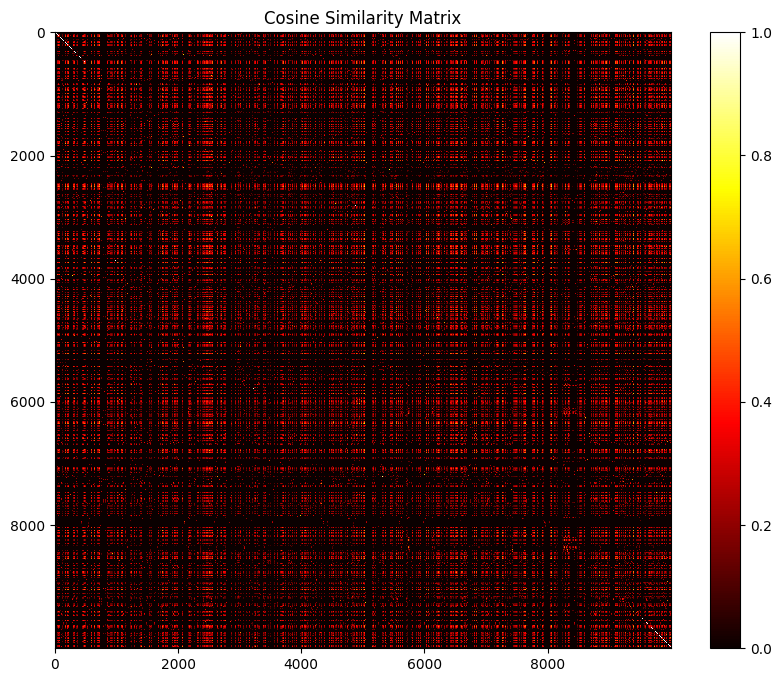

In [15]:
plt.figure(figsize=(10, 8))
plt.imshow(cosine_sim, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Cosine Similarity Matrix')
plt.show()
